In [1]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

# Try to predict weight as a function of height.
# Physics would suggest that weight is proportional to volume,
# and volume is proportional to height^3.  However we will
# use a linear parameter model with radial basis functions
# to model this nonlinear relationship.

heights = np.asarray([1.32, 1.45, 1.66, 1.88]).reshape(-1, 1)
weights = np.asarray([55, 67, 70, 100]).reshape(-1, 1)
centers = np.asarray([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]).reshape(-1, 1)
print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

centers.shape (6, 1)
heights.shape (4, 1)
weights.shape (4, 1)


In [21]:
# I recommend playing around with these parameters and seeing how well you fit
# the data.  Changing one of the parameters will change the optimal value of
# the other:
sigma = 0.3
alpha = 0.0001

# New representation:
x= rbf_kernel(heights, centers, gamma=1.0 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[0.71082193 0.95313379 0.97889261 0.7700242  0.46394002 0.21409545]
 [0.50915642 0.81193635 0.99170129 0.92774349 0.66475726 0.36482652]
 [0.23410162 0.4939439  0.79825009 0.98807171 0.93675516 0.68022386]
 [0.07567304 0.21409545 0.46394002 0.7700242  0.97889261 0.95313379]]


In [18]:
# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1.0 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

Score on training data =  0.9924049522845667
all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


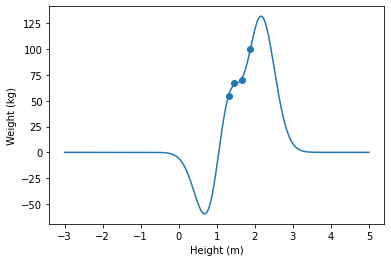

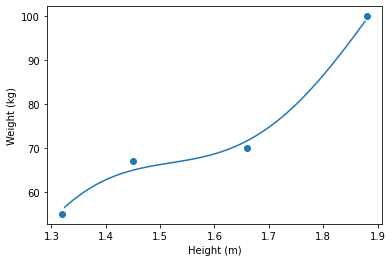

In [19]:
# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")


# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.show()
